In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [32]:
class PCA:
    def __init__(self,n_components):
        self.n_components=n_components # No of dimensions to reduce to
        self.components=None
        self.mean=None

    
    def fit(self,X): #Unsupervised so no need class labels
        # Subtract mean from x
        self.mean=np.mean(X,axis=0)
        X=X-self.mean

        #Find Cov(X,X)
        cov=np.cov(X.T)

        #Find eigenvectors and eigenvalues
        eigenvectors,eigenvalues=np.linalg.eig(cov)

        #Transform eigenvector a column matrix to a row matrix
        eigenvectors=eigenvectors.T

        #Sort eigenvalues in decreasing order
        idxs= np.argsort(eigenvalues)[::-1]
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]

        #Choose the first k eigenvectors
        self.components= eigenvectors[:self.n_components]

    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.components.T)

In [33]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

pca=PCA(3)
pca.fit(X)
X_projected=pca.transform(X)

print(X.shape)
print(X_projected.shape)

(150, 4)
(150, 3)


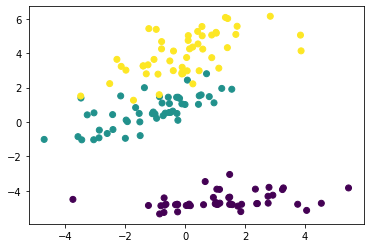

In [34]:
x1=X_projected[:,0]
x2=X_projected[:,1]
plt.scatter(x1,x2,c=y)
plt.show()